In [1]:
import MDAnalysis
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
import math
import os
import sys
import statistics
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from pylab import *
from tqdm import tqdm

/home/mescalin/kgutenbrunner/.conda/envs/MDanalysis/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## structure overview

In [2]:
import varnaapi
varnaapi.set_VARNA('/home/mescalin/kgutenbrunner/Downloads/VARNAv3-93.jar')

In [3]:
from varnaapi import Structure
seq =  'UUUGGGGCGCGACAACUUGAGUCGCCGAUCCUCACUCAAAAACUACAGAGGAUCAAGCCCCUCUUCAUUUUCA'
ss =  r'[[.((((((((((.......))))).(((((((.....{{{{.....)))))))]])))))......}}}}..'
v = varnaapi.Structure(sequence=seq, structure=ss)
# .update(bpStyle='simple', drawBackbone=True, bp='#006400', fillBases=True, spaceBetweenBases=1, resolution=2)
style_bp_triple1 = varnaapi.param.BasesStyle(fill="red")
# style_bp_triple2 = varnaapi.param.BasesStyle(fill="orange")

style_pk1 = varnaapi.param.BasesStyle(fill="blue")
style_pk2 = varnaapi.param.BasesStyle(fill="green")

v.add_bases_style(style_bp_triple1, [3, 28, 53])
# v.add_bases_style(style_bp_triple2, [3, 26, 41])
v.add_bases_style(style_pk1, [1, 2, 55, 56])
v.add_bases_style(style_pk2, [39, 40, 41, 42, 68, 69, 70, 71])

# v.add_aux_BP(15, 41, color="green")
# v.add_aux_BP(16, 40, color="green")
# v.add_aux_BP(17, 39, color="green")
# v.add_aux_BP(18, 38, color="green")

# v.add_aux_BP(1, 30, color="blue")
# v.add_aux_BP(2, 29, color="blue")

v.add_aux_BP(3, 28, color="red")
v.add_aux_BP(3, 53, color="red")
v.add_aux_BP(28, 53, color="red")

v.savefig('/scr/aldea/kgutenbrunner/working/MD/only_bt_constr/structure.png')
v.show()

Output file: /scr/aldea/kgutenbrunner/working/MD/only_bt_constr/structure.png

Output file: /tmp/tmpn9_86ao3.svg



JupyterSvgImage(svg='<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" \n"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n\n<svg width="401.30218484624663px" height="359px" version="1.1" viewBox="0 0 500 400" \nxmlns="http://www.w3.org/2000/svg">\n<line x1="106.30218484624663" y1="346.0600500434314" x2="113.80218484624663" y2="346.0600500434314" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="123.80218484624663" y1="346.0600500434314" x2="131.30218484624663" y2="346.0600500434314" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="141.30218484624663" y1="346.0600500434314" x2="148.80218484624663" y2="346.0600500434314" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="153.80218484624663" y1="341.0600500434314" x2="153.80218484624663" y2="331.0600500434314" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="153.80218484624663" y1="321.0600500434314" x2="153.80218484624663" y2="311.0600500434314" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="153.80218484624663" y1="301.0600500434314" x2="153.80218484624663" y2="291.0600500434314" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="153.80218484624663" y1="281.0600500434314" x2="153.80218484624663" y2="271.0600500434314" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="150.2666509403139" y1="262.52451613749867" x2="144.71598465181427" y2="256.97384984899907" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="136.18045074588153" y1="253.4383159430663" x2="126.1804507458815" y2="253.4383159430663" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="116.1804507458815" y1="253.4383159430663" x2="106.18045074588153" y2="253.4383159430663" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="96.18045074588153" y1="253.4383159430663" x2="86.1804507458815" y2="253.4383159430663" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="76.1804507458815" y1="253.4383159430663" x2="66.1804507458815" y2="253.4383159430663" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="57.170217283176754" y1="256.42462262098854" x2="51.154862679502315" y2="260.90408592158843" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="42.14480572450654" y1="263.9324050492695" x2="34.64506498830818" y2="263.99542377010425" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="25.58539124090744" y1="261.1189407331293" x2="19.49561139406738" y2="256.7411942938767" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="13.882687015754513" y1="249.07001948197936" x2="11.55307412320316" y2="241.9409952682298" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="11.55307412320315" y1="232.4356366179028" x2="13.882687015754467" y2="225.30661240415327" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="19.495611394067318" y1="217.63543759225593" x2="25.585391240907448" y2="213.2576911530033" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="34.64506498830818" y1="210.3812081160283" x2="42.14480572450651" y2="210.44422683686304" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="51.15486267950229" y1="213.47254596454414" x2="57.170217283176754" y2="217.95200926514403" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="66.1804507458815" y1="220.9383159430663" x2="76.1804507458815" y2="220.9383159430663" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="86.1804507458815" y1="220.9383159430663" x2="96.1804507458815" y2="220.9383159430663" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="106.1804507458815" y1="220.9383159430663" x2="116.1804507458815" y2="220.9383159430663" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="126.1804507458815" y1="220.9383159430663" x2="136.1804507458815" y2="220.9383159430663" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="144.68681706721753" y1="217.37385311949802" x2="149.82360311165934" y2="212.1519563722521" stroke

# plots

## histograms

In [12]:
distances_file = os.path.join(base_folder, 'distances.txt')

distances_hist = {}
with open(distances_file, 'r') as f:
    distances = None
    force = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_hist[force] = distances
            force=line[1:-3]
            distances=[]

del distances_hist[None]
distances_hist[force] = distances
force=line


/scr/aldea/kgutenbrunner/working/MD/only_bt_constr/histogram_combined.png


''

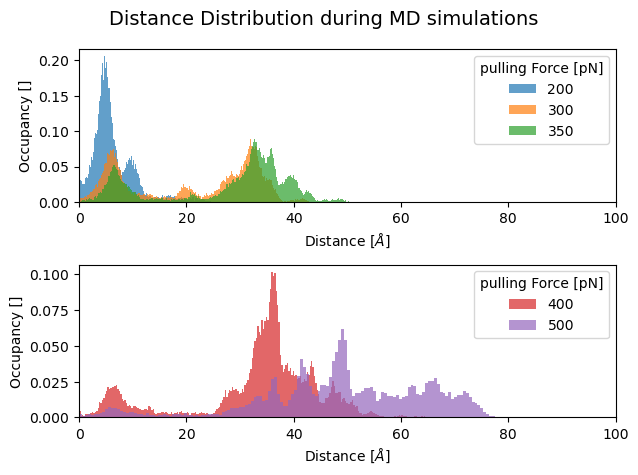

In [13]:
import matplotlib.colors as mcolors

force_A = [200, 300, 350]
force_B = [400, 500]
colors =list(mcolors.TABLEAU_COLORS.values())


fig, axs = plt.subplots(2)

i = 0
for force in force_A:
    axs[0].hist(distances_hist[str(force)], bins=250, density=True, alpha=0.7, label=force, color=colors[i])
    i+=1
#xs[0].legend(title='pulling Force [pN]')
axs[0].set_xlim(0, 100)
axs[0].set_xlabel(r'Distance [$\AA$]')
axs[0].set_ylabel('Occupancy []')

axs[0].legend(title='pulling Force [pN]')

for force in force_B:
    axs[1].hist(distances_hist[str(force)], bins=250, density=True, alpha=0.7, label=force,  color=colors[i])
    i+=1

axs[1].set_xlim(0, 100)
axs[1].set_xlabel(r'Distance [$\AA$]')
axs[1].set_ylabel('Occupancy []')
axs[1].legend(title='pulling Force [pN]')


save_under = os.path.join(base_folder, 'histogram_combined.png')
print(save_under)

fig.suptitle(f'Distance Distribution during MD simulations', fontsize=14)
fig.tight_layout()

plt.savefig(save_under)
;

## bp distance

In [19]:
distances_file = os.path.join(base_folder, 'pk1_distance.txt')

distances_pk1 = {}
with open(distances_file, 'r') as f:
    distances = None
    force = None
    for line in f.readlines():
        if not line.startswith('>'):
            distances.append(float(line))
        else:
            distances_pk1[force] = distances
            force=line[1:-3]
            distances=[]

del distances_pk1[None]
distances_pk1[force] = distances
force=line


/scr/aldea/kgutenbrunner/working/MD/only_bt_constr/pk1_distance_comb.png


''

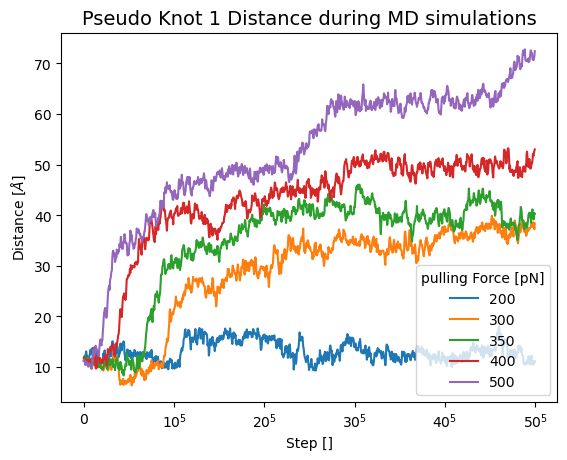

In [20]:
for key,value in distances_pk1.items():
    plt.plot(value, label=key.replace("run", ''))
plt.legend(title='pulling Force [pN]', loc=4)
plt.title(f'Pseudo Knot 1 Distance during MD simulations', fontsize=14)
plt.xticks([0, 200, 400, 600, 800, 1000], [0, r"$10^5$", r"$20^5$", r"$30^5$", r"$40^5$", r"$50^5$"])
plt.xlabel('Step []')
plt.ylabel(r'Distance [$\AA$]')

save_under = os.path.join(base_folder, 'pk1_distance_comb.png')
print(save_under)
plt.savefig(save_under)
;
;

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


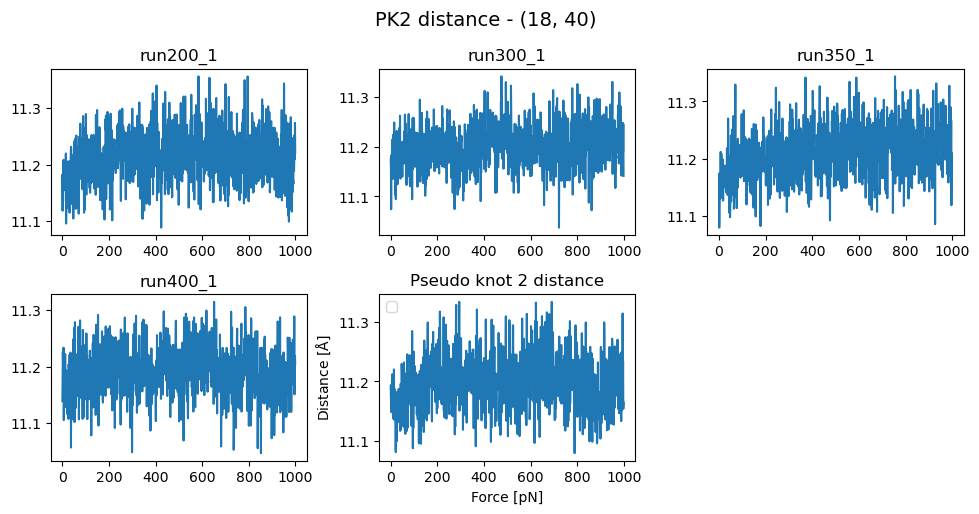

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(10,5))
for i, run in enumerate(pk2_distances.keys()):
    distances = pk2_distances[run]
    col_mean = np.median(distances, axis=0)
    row = math.floor(i/3)
    col = i%3
    axs[row, col].plot(col_mean)
    axs[row, col].set_title(run)
fig.delaxes(axs[-1, -1])
fig.suptitle('PK2 distance - (18, 40)', fontsize=14)
fig.tight_layout()


plt.legend(loc='upper left')
plt.title('Pseudo knot 2 distance')
plt.xlabel("Force [pN]")
plt.ylabel(r"Distance [$\text{Å}$]")
#plt.savefig(f'{base_folder}PK2_dis.png')


plt.show()


## basepair distance

In [4]:
def get_pairwise_distances(dcd_file, pdb_file, movie_skip):
    u = MDAnalysis.Universe(pdb_file, dcd_file)
    selection = u.select_atoms("record_type ATOM")
    pairwise_distances = []

    for t, ts in enumerate(u.trajectory):
        if t % movie_skip != 0:
            continue
        
        t = int(t/movie_skip)
        pairwise_distances.append([])
        positions = selection.center(None, compound="residues")

        for i, pos_i in enumerate(positions):
            pairwise_distances[t].append([])
            for j, pos_j in enumerate(positions):
                if i > j:
                    pairwise_distances[t][i].append(pairwise_distances[t][j][i])
                else:
                    pairwise_distances[t][i].append(np.linalg.norm(pos_j-pos_i))

    return pairwise_distances


In [5]:
def get_bp_distance(dcd_file, pdb_file, movie_skip, bp):
    u = MDAnalysis.Universe(pdb_file, dcd_file)
    selection = u.select_atoms("record_type ATOM")
    distances = []

    for t, ts in enumerate(u.trajectory):
        if t % movie_skip != 0:
            continue
        t = int(t/movie_skip)
        positions = selection.center(None, compound="residues")
        pos_i = positions[bp[0]]
        pos_j = positions[bp[1]]
        distances.append(np.linalg.norm(pos_j-pos_i))

    return distances


In [6]:
base_folder = '/scr/aldea/kgutenbrunner/working/MD/only_bt_constr/'
runs = ['200_1', '300_1', '350_1', '400_1', '500_1']

foldernames = [f'{base_folder}run{run}/' for run in runs]
movie_skip = 1

basedir = os.getcwd()

pdb_file = base_folder + 'init.pdb'


### for all runs

In [7]:
pk1_distances = {}
pk1_bp = [0, 55]
for foldername in foldernames:
    dcd_files = [foldername + i for i in os.listdir(foldername) if i.endswith('.dcd')]
    run = foldername.split('/')[-2]
    pk1_distances[run] = []

    for dcd in dcd_files:
        pk1_distances[run].append(get_bp_distance(dcd, pdb_file, movie_skip, pk1_bp))


/home/mescalin/kgutenbrunner/.conda/envs/MDanalysis/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [8]:
with open('pk1_distance.txt', 'w') as f:
    for force in pk1_distances:
        f.write(f'>{force}\n')
        for dis in pk1_distances[force][0]:
            f.write(str(dis) + '\n')


In [9]:
pk2_distances = {}
pk2_bp = [40, 68]
for foldername in foldernames:
    dcd_files = [foldername + i for i in os.listdir(foldername) if i.endswith('.dcd')]
    run = foldername.split('/')[-2]
    pk2_distances[run] = []

    for dcd in dcd_files:
        pk2_distances[run].append(get_bp_distance(dcd, pdb_file, movie_skip, pk2_bp))


In [10]:
with open('pk2_distance.txt', 'w') as f:
    for force in pk2_distances:
        f.write(f'>{force}\n')
        for dis in pk2_distances[force][0]:
            f.write(str(dis) + '\n')


In [18]:
bp_triplet_distances = {}
bp_triplet = [2, 52]
for foldername in foldernames:
    dcd_files = [foldername + i for i in os.listdir(foldername) if i.endswith('.dcd')]
    run = foldername.split('/')[-2]
    bp_triplet_distances[run] = []

    for dcd in dcd_files:
        bp_triplet_distances[run].append(get_bp_distance(dcd, pdb_file, movie_skip, bp_triplet))


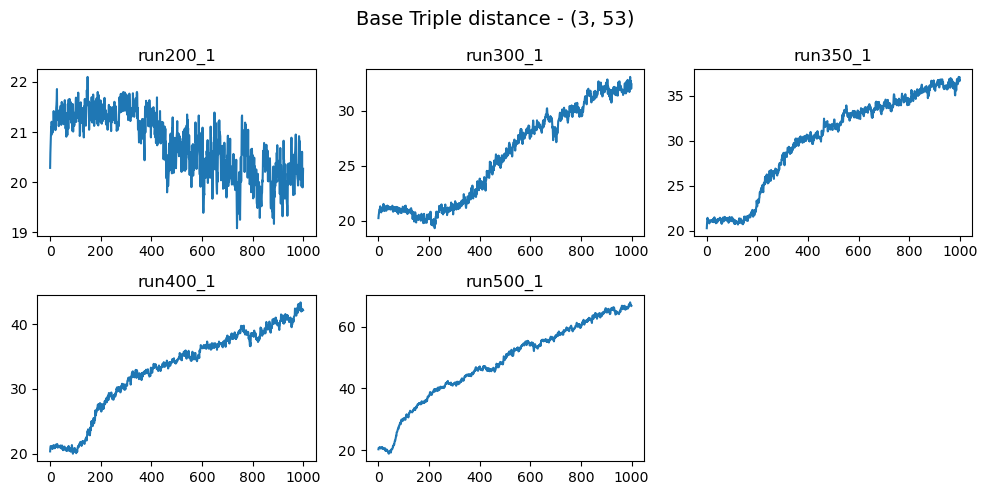

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(10,5))
for i, run in enumerate(bp_triplet_distances.keys()):
    distances = bp_triplet_distances[run]
    col_mean = np.median(distances, axis=0)
    row = math.floor(i/3)
    col = i%3
    axs[row, col].plot(col_mean)
    axs[row, col].set_title(run)
fig.delaxes(axs[-1, -1])
fig.suptitle('Base Triple distance - (3, 53)', fontsize=14)
fig.tight_layout()
plt.savefig(f'{base_folder}base_triple_dis.png')
plt.show()


In [20]:
def triangle_area_3d(point1, point2, point3):
    # Convert points to numpy arrays for easy vector operations
    p1 = np.array(point1)
    p2 = np.array(point2)
    p3 = np.array(point3)
    
    # Calculate the vectors representing two sides of the triangle
    v1 = p2 - p1
    v2 = p3 - p1
    
    # Calculate the cross product of the two vectors
    cross_product = np.cross(v1, v2)
    
    # Calculate the magnitude of the cross product vector
    area = np.linalg.norm(cross_product) / 2
    
    return area

In [21]:
def get_area(dcd_file, pdb_file, movie_skip, bp):
    u = MDAnalysis.Universe(pdb_file, dcd_file)
    selection = u.select_atoms("record_type ATOM")
    areas = []

    for t, ts in enumerate(u.trajectory):
        if t % movie_skip != 0:
            continue
        t = int(t/movie_skip)
        positions = selection.center(None, compound="residues")
        pos_i = positions[bp[0]]
        pos_j = positions[bp[1]]
        pos_k = positions[bp[2]]
        areas.append(triangle_area_3d(pos_i, pos_j, pos_k))

    return areas


In [22]:
bp_triplet_areas = {}
bp_triplet = [2, 27, 52]
for foldername in foldernames:
    dcd_files = [foldername + i for i in os.listdir(foldername) if i.endswith('.dcd')]
    run = foldername.split('/')[-2]
    bp_triplet_areas[run] = []

    for dcd in dcd_files:
        bp_triplet_areas[run].append(get_area(dcd, pdb_file, movie_skip, bp_triplet))


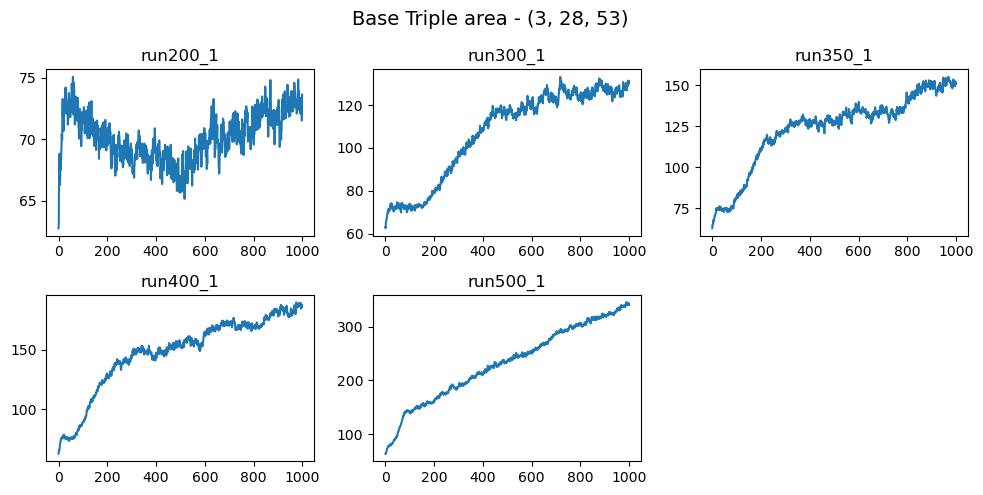

In [23]:
fig, axs = plt.subplots(2, 3, figsize=(10,5))
for i, run in enumerate(bp_triplet_areas.keys()):
    areas = bp_triplet_areas[run]
    col_mean = np.mean(areas, axis=0)
    row = math.floor(i/3)
    col = i%3
    axs[row, col].plot(col_mean)
    axs[row, col].set_title(run)
fig.delaxes(axs[-1, -1])
fig.suptitle('Base Triple area - (3, 28, 53)', fontsize=14)
fig.tight_layout()
plt.savefig(f'{base_folder}base_triple_area.png')